<a href="https://colab.research.google.com/github/jarrydmartinx/ml-basics/blob/master/matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix decomposition

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 1b

Setting up the environment

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt
import pickle

%matplotlib inline


## Covariance matrix and positive semidefinite matrix

For a dataset $X$ with $N$ examples and $D$ features, we can represent it as a matrix. What is the dimensions of this matrix $X$? The covariance matrix $C$ is the matrix representing the variance and covariance between each pair of features. What is the size of this matrix $C$?

### <span style="color:blue">Answer</span>
* The data matrix $X$ is $N$ by $D$
* The covariance matrix $C$ is $D$ by $D$

Generate a data matrix $X$ using ```gen_data``` from Tutorial 1a. Compute the covariance matrix $C$ and its eigenvalue decomposition using ```np.linalg.eigh```.

In [0]:
def gen_data(samples: int, mean: np.ndarray, cov: np.ndarray):
    
    """
    
    means is dim d
    cov is dim dxd
    samples is dim n
    features is dim d
    
    """
    
    assert mean.shape[0] == cov.shape[0] and cov.shape[0] == cov.shape[0]
    
    return np.random.multivariate_normal(mean, cov, samples)

def covariance(x: np.ndarray) -> np.ndarray:

    centered_x = x - np.mean(x, axis=0, keepdims=True)
    
    return np.matrix(np.dot(centered_x.T, centered_x) / x.shape[0])

In [0]:
x = gen_data(10, np.array([1, 3]), np.diag([1, 7]))
x

array([[ 0.72472403,  2.20949529],
       [ 1.71124313,  6.55564423],
       [ 1.92760346,  2.81567154],
       [ 3.44248358,  5.81932267],
       [ 0.22297827,  1.85903835],
       [-0.46080786,  3.02651712],
       [-0.39065614, -1.93584238],
       [ 1.13488135,  4.99988516],
       [ 1.0898408 ,  3.15555109],
       [ 1.61805441,  0.74898755]])

Covariance matrices are an example of a class of matrices which are *positive semidefinite*. A matrix $A$ is called symmetric if $A_{ij}=A_{ji}$. Another way to say this is that $A=A^\top$. A matrix $A\in\mathbb{R}^{n\times n}$ is called **positive semidefinite**, if for all vectors $x\in\mathbb{R}^n$,
$$
    x^\top A x \geqslant 0.
$$
Show that the eigenvalues of a positive semidefinite matrix are non-negative.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

## Principal component analysis (PCA)

You will see more about principal component analysis later in the course. For now, we will treat PCA as an exercise in matrix manipulation.

The **Singular Values** of a square matrix $A$ is defined as the square root of the eigenvalues of $A^T A$. Given a matrix $X$, the singular value decomposition (SVD) is given by
$$
X = U S V^T
$$
where $U$ and $V$ are orthogonal matrices containing the left and right singular vectors respectively. And $S$ is a matrix with the singular values along the diagonal.

Using the definition of the covariance matrix $C$:
1. Substitute the singular value decomposition of $X$
2. Simplify the resulting expression. You should have an expression of $C$ in terms of $U$ and $S$.
3. Recall from Tutorial 2, the definition of an eigenvalue decomposition.
4. What is the matrix that contains the eigenvectors corresponding to the $k$ largest eigenvalues of $C$?



Recall that PCA considers the covariance matrix of a data matrix $X$. Using the definition of SVD above, derive expressions for:
1. the eigenvectors
2. the projection of $X$ onto the $k$ largest eigenvalues


### Answer
* Recall that the $k$ principal components of X correspond exactly to the eigenvectors of the covariance matrix $C$, ordered in descending order by their eigenvalues
* The eigenvalues are exactly equal to the variance of the dataset along the corresponding eigenvectors
* In fact there exists a full set of orthonormal eigenvectors for the covariance matrix $C$ (Real Spectral Theorem)
* Below we show that the square roots of the eigenvalues of $X^\top X$ are the singular values of $X$.
For a centered matrix:
\begin{align}
C &= \frac{1}{n-1} X^\top X \\
&= \frac{1}{n-1}(U S V^\top)^\top(U S V^\top) \\
&= \frac{1}{n-1}VSU^\top U S V^\top \\
&= \frac{1}{n-1}V S^2 V^\top
\end{align}
* Hence the right-singular vectors of the $n \times d$ data matrix are the principal components (the eigenvectors of the covariance matrix). The eigenvalues are the square singular values.
* For an empirical covariance then:
* The columns of $V$ are the principal directions/axes (eigenvectors of $C$)
* The principal components (scores) are projection of X onto the principal directions
$$ XV = U S V^\top V = U S$$
* The eigenvalues of the covariance matrix C are:
\begin{align}
\lambda_i = s^2_i / (n-1) \qquad \text{where $s_i$ are the singular values of $X$}
\end{align}


## Implement PCA

Implement the principal component analysis method, using ```numpy.linalg.svd```. Your function should take the data matrix and return two matrices:
1. The projection of the data onto the principal components
2. The actual components (eigenvectors) themselves.

*Hint: do not forget to center the data by removing the mean*

In [0]:
def pca(data_matrix: np.ndarray):
    
    """
    data matrix X has shape n x d
    covariance matrix X.T . X has shape d x d
    eigenvectors have dimension d


    SVD USV of X has dimensions 
    U: n x n
    S: n x d
    V.T: d x d

    The eigenvectors are the columns of V = (V.T).T (dxd)
    The projection onto the principal directions is XV = USV.T V = US (nxd) 

"""
    
    shape = data_matrix.shape
    
    U, s_values, VT = np.linalg.svd(data_matrix)
    
    print('U: {}, s_values: {}, VT: {}'.format(U.shape, 
                                               s_values.shape, 
                                               VT.shape))
    
    directions = VT.T
    
    S = np.diag(s_values)
    S.resize(shape)
    
    projection = np.dot(U, S)
    
    return projection, directions
    
    
    


### Testing PCA

Use the code from Tutorial 1 to generate toy data with 100 samples in 5 dimensions. Recall that the data is from two Gaussians with unit variance, centered at $\mathbf{1}$ and $-\mathbf{1}$ respectively.

Obtain the projection of the toy data to its first two principal components. Plot the results. You should be able to see that the first principal component already gives you the axis of discrimination. Revisit the question of the effect of dimension on two Gaussians with unit variance.

(200, 5)
[34.94551506 14.82696273 14.1125023  13.52221266 12.97823256]


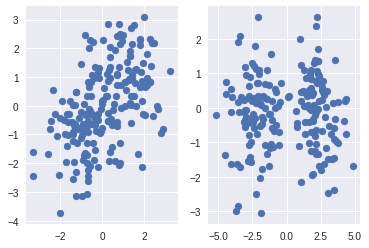

In [0]:
data_a = gen_data(100, 
                np.array(np.ones(5)), 
                np.diag(np.ones(5)))
data_b = gen_data(100, 
                np.array(np.ones(5) * -1.), 
                np.diag(np.ones(5)))


data = np.concatenate((data_a, data_b), axis=0)
print(data.shape)

projection, directions = pca(data)

columns=['x_1', 'x_2', 'x_3', 'x_4', 'x_5']


raw_df = pd.DataFrame(data, columns=columns)
projected_df = pd.DataFrame(projection, columns=columns)

x = raw_df.x_1
y = raw_df.x_2


plt.figure(1)
plt.subplot(121)
plt.scatter(x, y)

u, v = projected_df.x_1, projected_df.x_2

plt.subplot(122)
plt.scatter(u, v)

plt.show()

## (optional) Effect of normalisation on principal components

The toy dataset is generated from spherical Gaussians. Explore the following effects on PCA:
- Multiply each feature by a different scaling factor.
- Write a new function for generating data from more than 2 Gaussians, placed at different locations.
- Write a new function for generating data that generates Gaussians which are not spherical.

In [0]:
#@title Playing around with PCA Plotting

def non_spherical(num_gaussians: int, features: int, samples: int):
    """
    Samples means samples from EACH gaussian
    The shape returned will be (num_gaussians * samples, features)
    """
    
    data_list = []
    for i in range(num_gaussians):
        data_list.append(gen_data(samples, 
                                  np.random.randint(-10, 10, size=features), 
                                  np.diag(np.random.randint(30, size=features))))

    data = np.concatenate(data_list, axis=0)
        
    return data

In [0]:
non_spherical(3, 5, 100).shape

(300, 5)

[109.37832751  92.42851196  47.27473569  32.11181957  26.24055705]


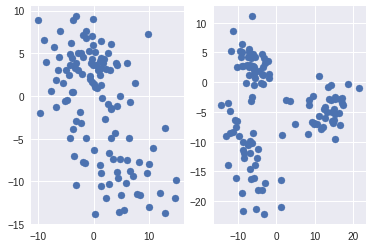

In [0]:
data = non_spherical(3, 5, 40)

projection, directions = pca(data)

columns_x=['x_1', 'x_2', 'x_3', 'x_4', 'x_5']
columns_v=['v_1', 'v_2', 'v_3', 'v_4', 'v_5']


raw_df = pd.DataFrame(data, columns=columns_x)
projected_df = pd.DataFrame(projection, columns=columns_v)

x = raw_df.x_1
y = raw_df.x_2


plt.figure(1)
plt.subplot(121)
plt.scatter(x, y)

u, v = projected_df.v_1, projected_df.v_2

plt.subplot(122)
plt.scatter(u, v)


plt.show()

## Eigenfaces

The aim of this section of the tutorial is to see that in some cases, the principal components can be human interpretable.

The images below are of Colin Powell, resized to a smaller image, from [LFW](http://vis-www.cs.umass.edu/lfw/). Download the images from [the course website](https://machlearn.gitlab.io/isml2018/tutorials/lfw_colin.pkl).

In [0]:
# Visualising images
def plot_gallery(images, titles, h, w, n_row=2, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())



In [0]:
! curl https://machlearn.gitlab.io/isml2018/tutorials/lfw_colin.pkl > lfw_colin.pkl
lfw_colin = pickle.load(open('lfw_colin.pkl', 'rb'))

# introspect the images array to find the shapes (for plotting)
n_samples, h, w = lfw_colin['images'].shape
plot_gallery(lfw_colin['images'], range(n_samples), h, w)


In [0]:
# ! curl http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz > lfw_funneled.tgz
    

In [0]:
# ! tar -xvzf lfw_funneled.tgz

Use the ```pca``` function you wrote above to find the first 15 principal components. Visualise them. Discuss what the components potentially capture, for example lighting from the right.

*Hint: Images need to be converted into a vector for PCA, and the results need to be converted back*

In [0]:
lfw_colin['images'].shape

(236, 50, 37)

In [0]:
def eigenfaces(images: np.ndarray,
               num_faces: int):
    
    n_samples, h, w = images.shape
    
    vector_images = np.reshape(images, (n_samples, h * w))
    
    print(vector_images.shape)
    
    projected_data, e_vectors = pca(vector_images)
    
    principal_dirs = e_vectors[:, :num_faces].T
    
    print(principal_dirs.shape)
    
    eigenfaces = np.reshape(principal_dirs, (num_faces, h, w))
    
    plot_gallery(eigenfaces, range(num_faces), h, w)

(236, 1850)
U: (236, 236), s_values: (236,), VT: (1850, 1850)
(12, 1850)


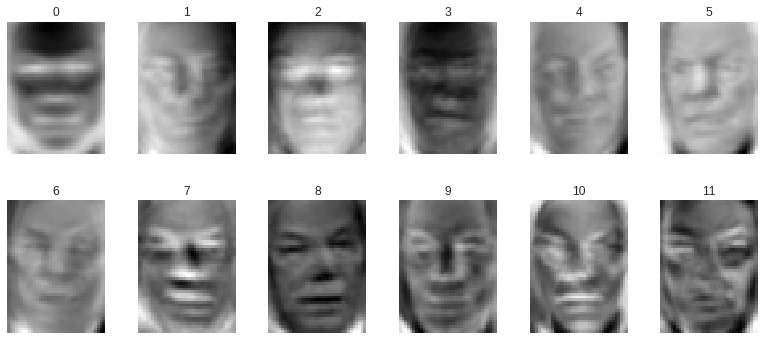

In [0]:
eigenfaces(lfw_colin['images'], 12)